In [520]:
# David Hui
# Pyber - 12/16/2017

In [521]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [522]:
city = "raw_data/city_data.csv"
ride = "raw_data/ride_data.csv"

In [523]:
city_df = pd.read_csv(city, encoding="iso-8859-1",low_memory=False)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [524]:
ride_df = pd.read_csv(ride, encoding="iso-8859-1",low_memory=False)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [525]:
###############################################################
#
#Create two data frames -  City and Ride
#
###############################################################

city_type_driver_count_df = pd.merge(ride_df, city_df, on = "city", how="outer")

city_type_driver_count_df.head()


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [526]:

total_ride_df = pd.DataFrame(ride_df.groupby(["city"]).count())

del total_ride_df["date"]
del total_ride_df["fare"]
total_ride_df.reset_index(inplace=True)
total_ride_df.rename(columns={"ride_id":"total rides"}, inplace=True)

total_ride_df.head()

,city,total rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [527]:
avg_fare_df = pd.DataFrame(city_type_driver_count_df.groupby(["city","driver_count","type"]).sum())
del avg_fare_df["ride_id"]
avg_fare_df.head()

,,,fare
city,driver_count,type,
Alvarezhaven,21,Urban,741.79
Alyssaberg,67,Urban,535.85
Anitamouth,16,Suburban,335.84
Antoniomouth,21,Urban,519.75
Aprilchester,49,Urban,417.65


In [528]:
#############################################################
#
# Avg Fare ($) Per City  == Y axis
#
#############################################################

In [529]:

avg_fare_df.reset_index(inplace=True)
#avg_fare_df = pd.merge(avg_fare_df, total_ride_df, on="city")

#avg_fare_df["avg ride fare"] = avg_fare_df["fare"] / avg_fare_df["driver_count"]
#avg_fare_df["avg ride fare"] = avg_fare_df["fare"] / avg_fare_df["total rides"]     
avg_fare_df.head()                                             
                                                  

,city,driver_count,type,fare
0,Alvarezhaven,21,Urban,741.79
1,Alyssaberg,67,Urban,535.85
2,Anitamouth,16,Suburban,335.84
3,Antoniomouth,21,Urban,519.75
4,Aprilchester,49,Urban,417.65


In [530]:
###################################################################
#
# Total number of Rides (Per City)  -- X axis
#
####################################################################


In [531]:
total_ride_df = pd.DataFrame(city_type_driver_count_df.groupby(["city"]).count())
total_ride_df.reset_index(inplace=True)
#avg_fare_df["avg ride fare"] = avg_fare_df["fare"] / avg_fare_df["driver_count"]
#del avg_fare_df["ride_id"]
del total_ride_df["type"]
del total_ride_df["date"]
del total_ride_df["fare"]
del total_ride_df["ride_id"]
total_ride_df.rename(columns={"driver_count":"total rides"}, inplace=True)
total_ride_df.head()

,city,total rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [532]:
###################################################################
#
# Total number of Drivers (Per City)  -- Z axis
#
####################################################################

final_df = pd.merge(total_ride_df, avg_fare_df, on="city")
final_df["avg ride fare"] = final_df["fare"] / final_df["total rides"]  
final_df.head()

,city,total rides,driver_count,type,fare,avg ride fare
0,Alvarezhaven,31,21,Urban,741.79,23.928710
1,Alyssaberg,26,67,Urban,535.85,20.609615
2,Anitamouth,9,16,Suburban,335.84,37.315556
3,Antoniomouth,22,21,Urban,519.75,23.625000
4,Aprilchester,19,49,Urban,417.65,21.981579


In [533]:
Urban_df = final_df.loc[final_df["type"] == "Urban"]
Suburban_df = final_df.loc[final_df["type"] == "Suburban"]
Rural_df = final_df.loc[final_df["type"] == "Rural"]

In [534]:
Urban_z = Urban_df["driver_count"]
Urban_y = Urban_df["avg ride fare"]
Urban_x = Urban_df["total rides"]
Urban_df.head()

,city,total rides,driver_count,type,fare,avg ride fare
0,Alvarezhaven,31,21,Urban,741.79,23.928710
1,Alyssaberg,26,67,Urban,535.85,20.609615
3,Antoniomouth,22,21,Urban,519.75,23.625000
4,Aprilchester,19,49,Urban,417.65,21.981579
5,Arnoldview,31,41,Urban,778.30,25.106452


In [535]:
Suburban_z = Suburban_df["driver_count"]
Suburban_y = Suburban_df["avg ride fare"]
Suburban_x = Suburban_df["total rides"]
Suburban_df.head()

,city,total rides,driver_count,type,fare,avg ride fare
2,Anitamouth,9,16,Suburban,335.84,37.315556
6,Campbellport,15,26,Suburban,505.67,33.711333
7,Carrollbury,10,4,Suburban,366.06,36.606000
9,Clarkstad,12,21,Suburban,372.62,31.051667
10,Conwaymouth,11,18,Suburban,380.51,34.591818


In [536]:

Rural_z= Rural_df["driver_count"]
Rural_y = Rural_df["avg ride fare"]
Rural_x = Rural_df["total rides"]
Rural_df.head()

,city,total rides,driver_count,type,fare,avg ride fare
17,East Leslie,11,9,Rural,370.27,33.660909
18,East Stephen,10,6,Rural,390.53,39.053000
19,East Troybury,7,3,Rural,232.71,33.244286
21,Erikport,8,3,Rural,240.35,30.043750
25,Hernandezshire,9,10,Rural,288.02,32.002222


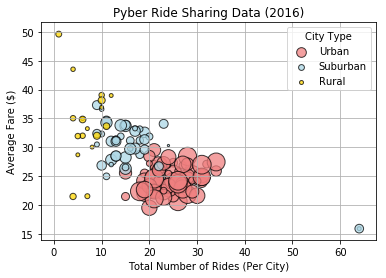

In [537]:
plt.scatter(Urban_x, Urban_y, s=Urban_z*5, alpha=0.75, linewidths=1.0, edgecolors="black",facecolors="lightcoral",label="Urban")

plt.scatter(Suburban_x, Suburban_y, s=Suburban_z*5,linewidths=1.0, alpha=0.75, edgecolors="black",facecolors="lightblue" , label="Suburban")

plt.scatter(Rural_x, Rural_y, s=Rural_z*5, linewidths=1.0,alpha=0.75, edgecolors="black",facecolors="gold", label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.legend(loc="best", title="City Type", markerscale=0.7)

plt.grid()
plt.show()

In [538]:
#########################################################
#
# % of Total Fares by City Type
#
#########################################################

In [539]:
# Create a group based on the values in the 'type' column
city_type_group = final_df.groupby('type')

city_type_group.head()



,city,total rides,driver_count,type,fare,avg ride fare
0,Alvarezhaven,31,21,Urban,741.79,23.928710
1,Alyssaberg,26,67,Urban,535.85,20.609615
2,Anitamouth,9,16,Suburban,335.84,37.315556
3,Antoniomouth,22,21,Urban,519.75,23.625000
4,Aprilchester,19,49,Urban,417.65,21.981579
5,Arnoldview,31,41,Urban,778.30,25.106452
6,Campbellport,15,26,Suburban,505.67,33.711333
7,Carrollbury,10,4,Suburban,366.06,36.606000
9,Clarkstad,12,21,Suburban,372.62,31.051667
10,Conwaymouth,11,18,Suburban,380.51,34.591818


In [540]:
#fare_sum = city_type_group["fare"].sum()

fare_sum_df = pd.DataFrame(final_df.groupby(["type"]).sum())

total_fare = fare_sum_df["avg ride fare"].sum()
fare_sum_df

,total rides,driver_count,fare,avg ride fare
type,,,,
Rural,125,104,4255.09,615.728572
Suburban,721,638,20335.69,1268.627391
Urban,1625,2607,40078.34,1623.863390


In [541]:
for index, row in fare_sum_df.iterrows():
    percent = ((row["avg ride fare"] / total_fare) * 100)
    fare_sum_df.set_value(index, "percentage", percent)

#fare_sum_df["percentage"] = fare_sum_df["percentage"].map("{0:,.2f}%".format)
#del fare_sum_df["total rides"]
#del fare_sum_df["driver_count"]
#del fare_sum_df["fare"]
#del fare_sum_df["avg ride fare"]

fare_sum_df.sort_values(by=["percentage"])
fare_sum_df.head()

,total rides,driver_count,fare,avg ride fare,percentage
type,,,,,
Rural,125,104,4255.09,615.728572,17.551028
Suburban,721,638,20335.69,1268.627391,36.161576
Urban,1625,2607,40078.34,1623.863390,46.287396


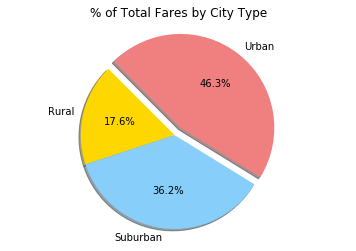

In [542]:

explode = (0, 0, 0.10)
labels=[]
pert=[]
colors=[]
for index, row in fare_sum_df.iterrows():
    labels.append(index)
    pert.append(row["percentage"])
    if index == 'Urban':
        colors.append('lightcoral')
    else :
        if index == 'Suburban':
            colors.append('lightskyblue')
        else:
            colors.append('gold')
    
plt.pie(pert, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=135)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

In [543]:
################################################################
#
# TotalRides by City Type
#
################################################################


In [544]:
total_rides = fare_sum_df["total rides"].sum()

for index, row in fare_sum_df.iterrows():
    percent = ((row["total rides"] / total_rides) * 100)
    fare_sum_df.set_value(index, "% total rides", percent)
fare_sum_df.sort_values(by=["% total rides"])   

,total rides,driver_count,fare,avg ride fare,percentage,% total rides
type,,,,,,
Rural,125,104,4255.09,615.728572,17.551028,5.058681
Suburban,721,638,20335.69,1268.627391,36.161576,29.178470
Urban,1625,2607,40078.34,1623.863390,46.287396,65.762849


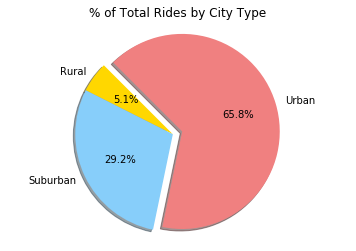

In [545]:

    
explode = (0, 0, 0.10)
labels=[]
pert=[]
colors=[]
for index, row in fare_sum_df.iterrows():
    labels.append(index)
    pert.append(row["% total rides"])
    if index == 'Urban':
        colors.append('lightcoral')
    else :
        if index == 'Suburban':
            colors.append('lightskyblue')
        else:
            colors.append('gold')
            
plt.pie(pert, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=135)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

In [546]:
total_drivers = fare_sum_df["driver_count"].sum()

for index, row in fare_sum_df.iterrows():
    percent = ((row["driver_count"] / total_drivers) * 100)
    fare_sum_df.set_value(index, "% total drivers", percent)
fare_sum_df.sort_values(by=["% total drivers"])  


,total rides,driver_count,fare,avg ride fare,percentage,% total rides,% total drivers
type,,,,,,,
Rural,125,104,4255.09,615.728572,17.551028,5.058681,3.105405
Suburban,721,638,20335.69,1268.627391,36.161576,29.178470,19.050463
Urban,1625,2607,40078.34,1623.863390,46.287396,65.762849,77.844133


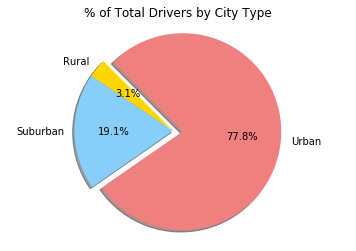

In [547]:
explode = (0, 0, 0.10)
labels=[]
pert=[]
colors=[]
for index, row in fare_sum_df.iterrows():
    labels.append(index)
    pert.append(row["% total drivers"])
    if index == 'Urban':
        colors.append('lightcoral')
    else :
        if index == 'Suburban':
            colors.append('lightskyblue')
        else:
            colors.append('gold')
            
plt.pie(pert, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=135)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

In [548]:
###########################################################################
##  Three Observations:
##
##  1. Urban has more rides , generate more revenue and has more drivers
##  2. Suburban has moderate number of rides, number of drivers and revenue
##  3. Rural has least number of rides, revenue and number of drivers
##
##
############################################################################